In [1]:
import h5py

/net/lofar1/data1/albert/miniconda3/envs/kerastf/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [17]:
with h5py.File('../../scripts/data/killms_datapack_2.hdf5') as f, h5py.File('../../scripts/data/killms_datapack_3.hdf5') as g:
    g['/sol000/tec000/val'][...] = f['/sol000/tec000/val'][...]
    g['/sol000/tec000/weight'][...] = f['/sol000/tec000/weight'][...]

In [1]:
from bayes_tec.bayes_opt.maximum_likelihood_tec import solve_ml_tec
from bayes_tec.datapack import DataPack
import numpy as np

/net/lofar1/data1/albert/miniconda3/envs/kerastf/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [46]:
with DataPack('../../scripts/data/killms_datapack_2.hdf5',readonly=True) as datapack:#'/home/albert/git/IonoTomo/src/ionotomo/data/NsolutionsDDE_2.5Jy_tecandphasePF_correctedlosoto_fulltime_dec27.h5',readonly=True) as datapack:
    datapack.switch_solset('posterior_sol')
    datapack.select(ant="RS*",time=slice(1,1000,1),pol=slice(0,1,1))
    tec, _ = datapack.tec
    datapack.switch_solset('sol000')
    phase, axes = datapack.phase
    
    tec_ml, _ = datapack.tec
    
    patch_names,directions = datapack.get_sources(axes['dir'])
    _, freqs = datapack.get_freqs(axes['freq'])
    _, times = datapack.get_times(axes['time'])
print(axes)
Nf = len(freqs)
Nt = len(times)
# phase_ = phase.transpose((0,1,2,4,3)).reshape((-1,Nf))
# tec_, sigma_ = solve_ml_tec(phase_,freqs,batch_size=int(1e6),max_tec=0.6,n_iter=30,K=3,t=2.)

2018-09-24 10:33:16,721 Appending to /net/lofar1/data1/albert/git/bayes_tec/scripts/data/killms_datapack_2.hdf5.
2018-09-24 10:33:16,735 Closing table.
2018-09-24 10:33:16,741 Reading from /net/lofar1/data1/albert/git/bayes_tec/scripts/data/killms_datapack_2.hdf5.
2018-09-24 10:33:18,341 Closing table.
{'pol': array(['XX'], dtype='<U2'), 'dir': array(['Dir00', 'Dir01', 'Dir02', 'Dir03', 'Dir04', 'Dir05', 'Dir06',
       'Dir07', 'Dir08', 'Dir09', 'Dir10', 'Dir11', 'Dir12', 'Dir13',
       'Dir14', 'Dir15', 'Dir16', 'Dir17', 'Dir18', 'Dir19', 'Dir20',
       'Dir21', 'Dir22', 'Dir23', 'Dir24', 'Dir25', 'Dir26', 'Dir27',
       'Dir28', 'Dir29', 'Dir30', 'Dir31', 'Dir32', 'Dir33', 'Dir34',
       'Dir35', 'Dir36', 'Dir37', 'Dir38', 'Dir39', 'Dir40', 'Dir41',
       'Dir42', 'Dir43', 'Dir44'], dtype='<U5'), 'ant': array(['RS106HBA', 'RS205HBA', 'RS208HBA', 'RS210HBA', 'RS305HBA',
       'RS306HBA', 'RS307HBA', 'RS310HBA', 'RS406HBA', 'RS407HBA',
       'RS409HBA', 'RS503HBA', 'RS508HBA', 

In [47]:
Npol,Nd, Na,Nf,Nt = phase.shape
# tec = tec_.reshape((Npol,Nd,Na,Nt))
# sigma = sigma_.reshape((Npol, Nd, Na, Nt))

def wrap(phi):
    return np.angle(np.exp(1j*phi))

# phase_pred = -8.448e9*tec[...,None,:]/freqs[:,None]
# res = (wrap(wrap(phase) - wrap(phase_pred)))
res = tec - tec_ml

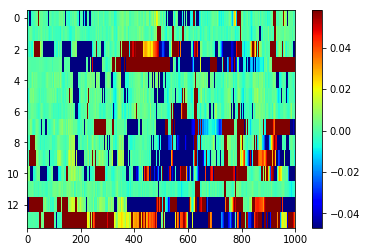

In [48]:
import numpy as np
import pylab as plt

import mpl_toolkits.mplot3d.axes3d as p3







# for l in range(Nt):
    
#     z = phase_pred[0,0,51,:,l]
#     x = times[l].mjd*np.ones(Nf)
#     y = freqs
# #     ax.scatter(x,y,z,c=plt.cm.jet(l/30),marker='+',alpha=0.5)
#     ax.plot(x,y,z,c='k',alpha=0.5)
#     ax.set_xlabel('times (mjd)')
#     ax.set_ylabel('frequency Hz')
#     ax.set_zlabel('phase (rad)')
# #     ax.set_zlim3d([-np.pi,np.pi])

# norm = plt.Normalize(res[0,0,51,:,:].min(),res[0,0,51,:,:].max())
norm = plt.Normalize(np.percentile(res,10),np.percentile(res,90))

c = plt.cm.jet(norm(res[0,0,:,:]))
plt.imshow(res[0,0,:,:], cmap=plt.cm.jet,norm=norm,aspect='auto')
plt.colorbar()
plt.show()

# fig = plt.figure(figsize=(12,12))
# ax = p3.Axes3D(fig)

    
# for l in range(Nf):
#     z = res[0,0,51,l,:]
#     x = times.mjd
#     y = freqs[l]*np.ones(Nt)
#     ax.plot(x,y,z,c='k',marker='+',alpha=0.9)
#     c = plt.cm.jet(norm(z))    
#     ax.scatter(x,y,z,c=c,alpha=0.5)
    
#     ax.set_xlabel('times (mjd)')
#     ax.set_ylabel('frequency Hz')
#     ax.set_zlabel('phase (rad)')
#     ax.set_zlim3d([-np.pi,np.pi])
# plt.show()
# plt.hist(res.flatten(),bins=100)
# plt.show()

In [43]:
from bayes_tec.datapack import DataPack
import numpy as np
import pylab as plt
plt.style.use('ggplot')
import os
        
def plot_solution_residuals(datapack, output_folder, data_solset='sol000', solution_solset='posterior_sol', 
                          ant_sel=None,time_sel=None,dir_sel=None,freq_sel=None,pol_sel=None):
    def _wrap(phi):
        return np.angle(np.exp(1j*phi))
    
    if not isinstance(datapack,str):
        datapack = datapack.filename

    output_folder = os.path.abspath(output_folder)
    os.makedirs(output_folder,exist_ok=True)

    solsets = [data_solset, solution_solset]
    with DataPack(datapack,readonly=True) as datapack:
        datapack.switch_solset(data_solset)
        datapack.select(ant=ant_sel,time=time_sel,dir=dir_sel,freq=freq_sel,pol=pol_sel)
        
        phase,axes = datapack.phase
        timestamps,times = datapack.get_times(axes['time'])
        antenna_labels, antennas = datapack.get_antennas(axes['ant'])
        patch_names, directions = datapack.get_sources(axes['dir'])
        _,freqs = datapack.get_freqs(axes['freq'])
        pols, _ = datapack.get_pols(axes['pol'])
        Npol,Nd,Na,Nf,Nt = phase.shape

        datapack.switch_solset(solution_solset)
        datapack.select(ant=ant_sel,time=time_sel,dir=dir_sel,freq=freq_sel,pol=pol_sel)
        tec,_ = datapack.tec
        phase_pred = -8.448e9*tec[...,None,:]/freqs[:,None]
        
        res = _wrap(_wrap(phase) - _wrap(phase_pred))
        cbar = None  
                
        for p in range(Npol):
            for a in range(Na):
                
                M = int(np.ceil(np.sqrt(Nd)))
                fig,axs = plt.subplots(nrows=2*M,ncols=M,sharex=True,figsize=(M*4,1*M*4),gridspec_kw = {'height_ratios':[1.5,1]*M})
                fig.subplots_adjust(wspace=0., hspace=0.)
                fig.subplots_adjust(right=0.85)
                cbar_ax = fig.add_axes([0.875, 0.15, 0.025, 0.7])
                
                vmin = -1.
                vmax = 1.
                norm = plt.Normalize(vmin, vmax)
                
                for row in range(0,2*M,2):
                    for col in range(M):
                        ax1 = axs[row][col]
                        ax2 = axs[row+1][col]
                        
                        d = col + row//2*M
                        if d >= Nd:
                            continue

                        img = ax1.imshow(res[p,d,a,:,:],origin='lower',aspect='auto',
                                  extent=(times[0].mjd*86400.,times[-1].mjd*86400.,freqs[0],freqs[-1]),
                                 cmap=plt.cm.jet, norm = norm)
                        ax1.text(0.05, 0.95, axes['dir'][d], horizontalalignment='left',verticalalignment='top', transform=ax1.transAxes,backgroundcolor=(1.,1.,1., 0.5))
                    
                        ax1.set_ylabel('frequency [Hz]')
                        ax1.legend()
                    

                        mean = res[p,d,a,:,:].mean(0)
                        ax2.plot(times.mjd*86400, mean,label=r'$\mathbb{E}_\nu[\delta\phi]$')
                        std = res[p,d,a,:,:].std(0)
                        ax2.fill_between(times.mjd*86400, mean - std, mean + std,alpha=0.5,label=r'$\pm\sigma_{\delta\phi}$')
                        ax2.set_xlabel('Time [mjs]')
                        ax2.set_xlim(times[0].mjd*86400.,times[-1].mjd*86400.)
                        ax2.set_ylim(-np.pi,np.pi)
#                         ax2.legend()
                        
                    
                fig.colorbar(img, cax=cbar_ax, orientation='vertical', label='phase dev. [rad]')
                filename = "{}_v_{}_{}_{}.png".format(data_solset,solution_solset, axes['ant'][a], axes['pol'][p])
                plt.savefig(os.path.join(output_folder,filename))
                plt.close('all')
                    
#                     plt.show()
        

In [44]:
plot_solution_residuals('../../scripts/data/killms_datapack_2.hdf5','output_folder',solution_solset='posterior_sol',ant_sel='RS*',time_sel=slice(1,1000,1),pol_sel=slice(0,1,1),dir_sel=slice(0,None,1))

2018-09-24 13:08:28,407 Appending to /net/lofar1/data1/albert/git/bayes_tec/scripts/data/killms_datapack_2.hdf5.
2018-09-24 13:08:28,413 Closing table.
2018-09-24 13:08:28,416 Reading from /net/lofar1/data1/albert/git/bayes_tec/scripts/data/killms_datapack_2.hdf5.
2018-09-24 13:11:31,232 Closing table.


In [45]:
import gpflow as gp

/net/lofar1/data1/albert/miniconda3/envs/kerastf/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/net/lofar1/data1/albert/miniconda3/envs/kerastf/lib/python3.6/site-packages/multipledispatch-0.4.9-py3.6.egg/multipledispatch/dispatcher.py:24: AmbiguityWarning: 
Ambiguities exist in dispatched function _expectation

The following signatures may result in ambiguous behavior:
	[Gaussian, Identity, NoneType, Kernel, InducingPoints], [Gaussian, Linear, NoneType, Sum, InducingPoints]


Consider making the following additions:

@dispatch(Gaussian, Identity, NoneType, Sum, InducingPoints)
def _expectation(...)
  warn(warning_text(dispatcher.name, ambiguities), AmbiguityWarning)


In [ ]:
gp.training.